# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: title={'center': 'Weight and Height in adults'}, xlabel='Height', ylabel='Weight'>

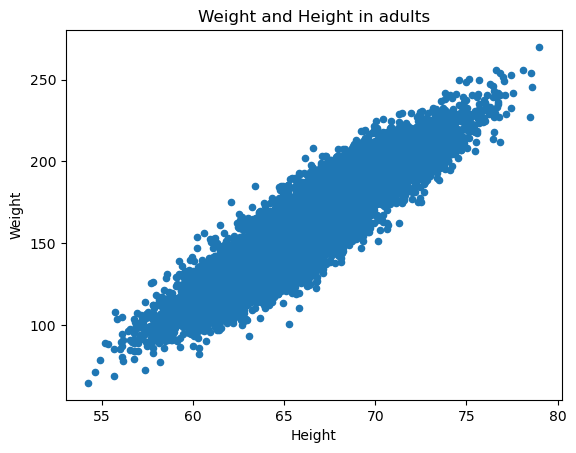

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

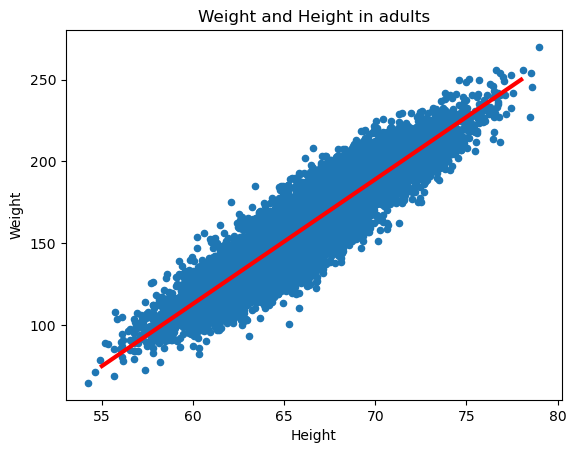

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

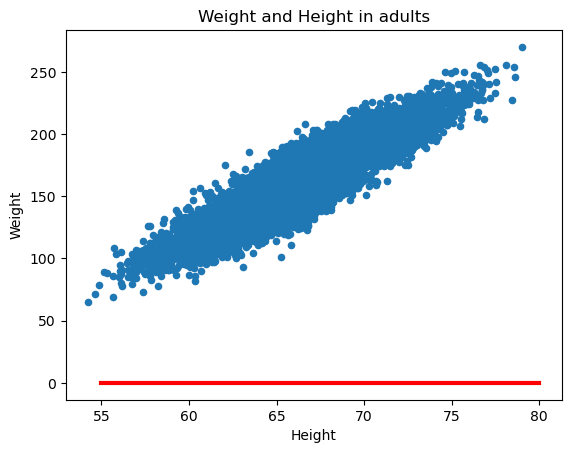

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

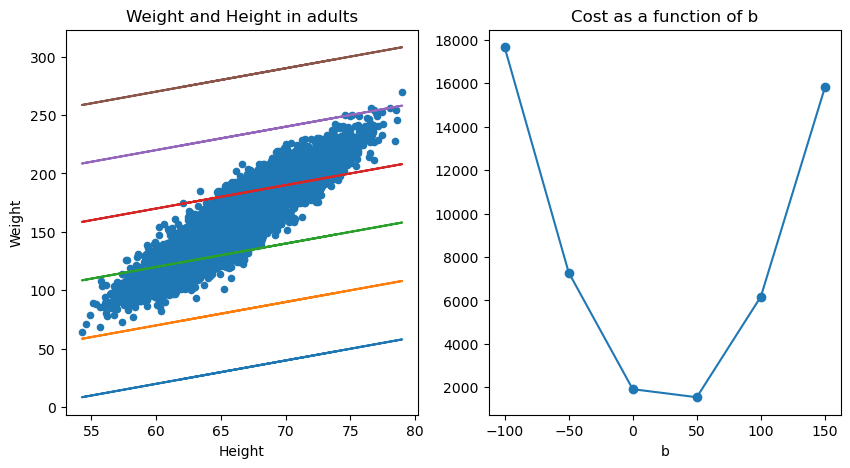

In [18]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

## Linear Regression with Keras

In [19]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [20]:
model = Sequential()

In [21]:
model.add(Dense(1, input_shape=(1,)))

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [24]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 1071.7972
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 551.5081
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 483.3225
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 487.2924
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 403.3379
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 355.2742
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 343.1826
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 287.8390
Epoch 9/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 269.9926
Epoch 10/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 243.5481
Epoch 11/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 218.9781
Epoch 12/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 240.1556
Epoch 13/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 221.7248
Epoch 14/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 207.6676


In [25]:
y_pred = model.predict(X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step


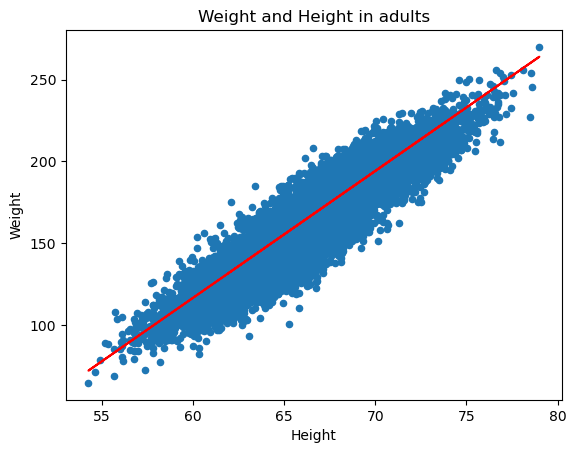

In [26]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [27]:
W, B = model.get_weights()

In [28]:
W

array([[7.7534013]], dtype=float32)

In [29]:
B

array([-348.50882], dtype=float32)

## Evaluating Model Performance

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.834


### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [34]:
len(X_train)

8000

In [35]:
len(X_test)

2000

In [36]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [37]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [38]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	152.6
The Mean Squared Error on the Test set is:	144.1


In [41]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.852
The R2 score on the Test set is:	0.861


# Classification

In [42]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [43]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


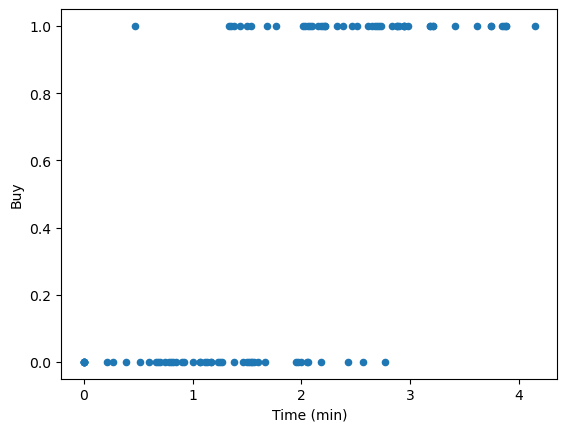

In [44]:
df.plot(kind='scatter', x='Time (min)', y='Buy');

In [45]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5829 - loss: 0.8414  
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.5511 
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.5125 
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - loss: 0.5955 
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7509 - loss: 0.5036 
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7773 - loss: 0.5100 
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8249 - loss: 0.4764 
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.4344 
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.4419 
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.4433 
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8270 - loss: 0.4477 
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8113 - loss: 0.4221 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


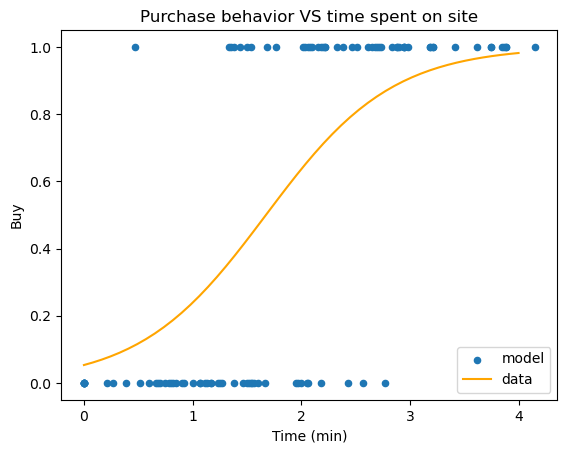

In [49]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [50]:
temp_class = model.predict(temp) > 0.5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [51]:
temp.shape

(50,)

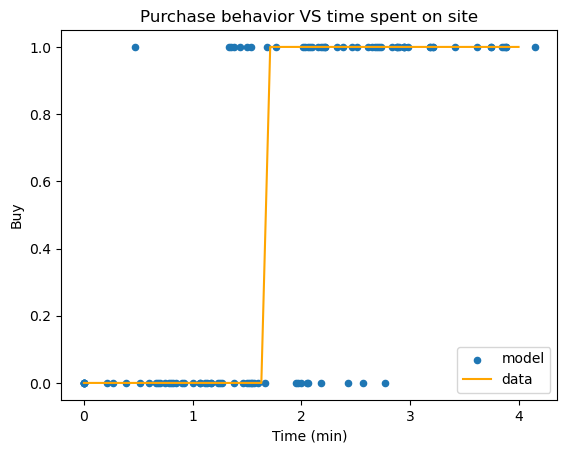

In [52]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [53]:
y_pred = model.predict(X[:,0])
y_class_pred = y_pred > 0.5

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.840


### Train/Test split


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [58]:
params = model.get_weights()
display (params)

[array([[0.]], dtype=float32), array([0.], dtype=float32)]

In [59]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X[:,0]) > 0.5)))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
The accuracy score is 0.500


In [60]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [61]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train[:,0]) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test[:,0]) > 0.5)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
The train accuracy score is 0.825
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The test accuracy score is 0.650


## Cross Validation

In [62]:
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [63]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [64]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [65]:
from sklearn.model_selection import cross_val_score, KFold

In [66]:
cv = KFold(3, shuffle=True)

In [67]:
scores = cross_val_score(model, X, y, cv=cv)

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. Whe

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
scores

array([0.82352941, 0.72727273, 0.81818182])

In [69]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7897 ± 0.0442


## Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 7, 43]], dtype=int64)

In [72]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [73]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,7,43


In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.827
Recall:  	0.860
F1 Score:	0.843


In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.83      0.86      0.84        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



## Feature Preprocessing

### Categorical Features

In [78]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [79]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [80]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


## Feature Transformations

#### 1) Rescale with fixed factor

In [81]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [82]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [83]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [84]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


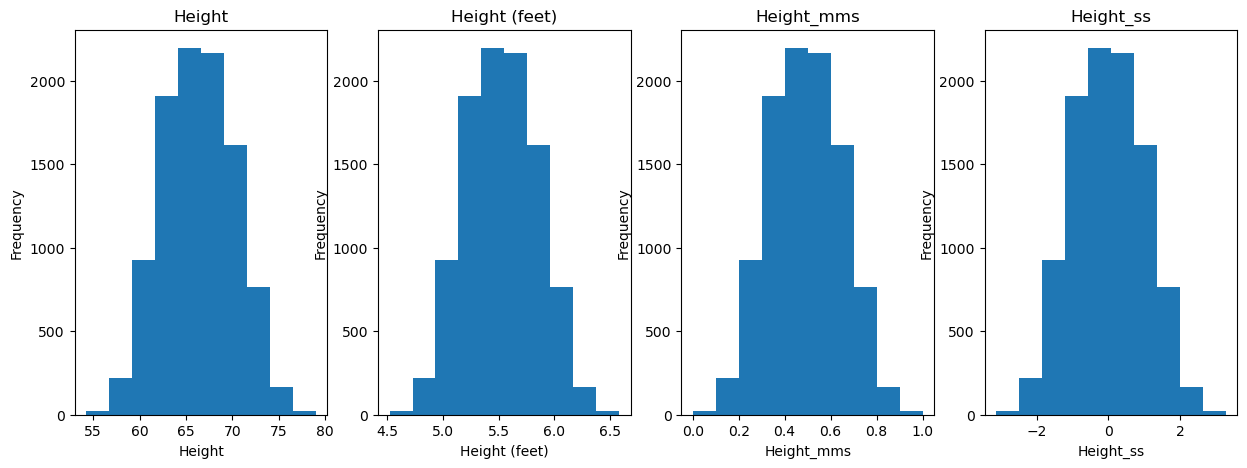

In [85]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature);

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [86]:
df = pd.read_csv('../data/housing-data.csv')

In [87]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sqft    47 non-null     int64
 1   bdrms   47 non-null     int64
 2   age     47 non-null     int64
 3   price   47 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [89]:
df_sqft = df['sqft'].values
df_bdrms = df['bdrms'].values
df_age = df['age'].values
df_price = df['price'].values

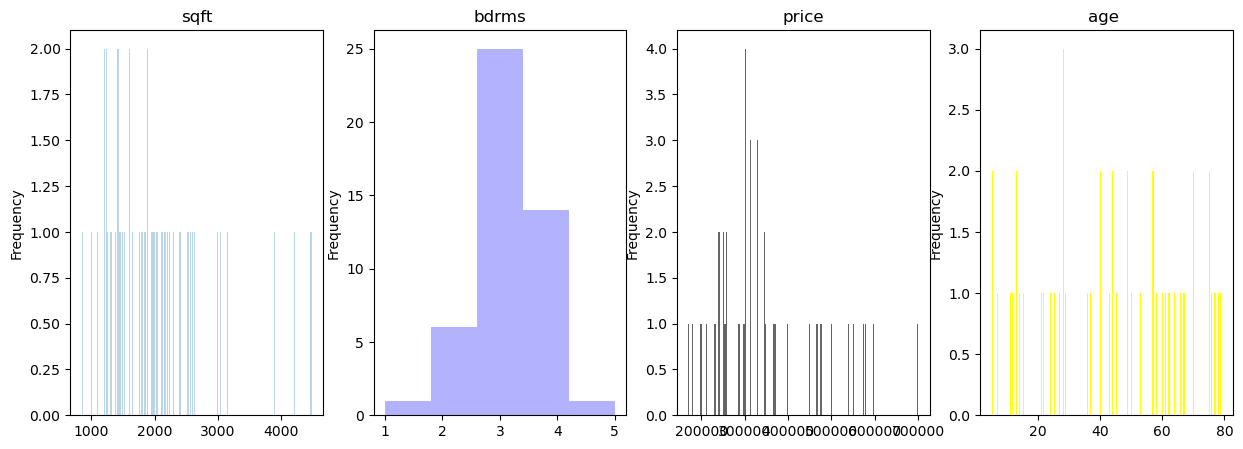

In [90]:
plt.figure(figsize=(15, 5))
plt.subplot(141)
df['sqft'].plot(kind ='hist' , bins = 200 , alpha = 0.3 ,title='sqft')
plt.subplot(142)
df['bdrms'].plot(kind ='hist' ,bins = 5,  alpha = 0.3 , color = 'blue',title='bdrms')
plt.subplot(143)
df['price'].plot(kind='hist', bins=200, color = 'black', alpha=0.6 , title='price');
plt.subplot(144)
df['age'].plot(kind='hist', bins=200, color = 'yellow',  alpha=1 , title='age ');

In [91]:
X = df[['sqft' ,'bdrms' , 'age']].values
y = df ['price'].values

In [92]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.summary()
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [95]:
model.fit(X_train, y_train , epochs = 10)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 127704342528.0000  
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133716697088.0000 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 123577032704.0000 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127690309632.0000 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127963553792.0000 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118096470016.0000 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 121223028736.0000 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120542044160.0000 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 116962934784.0000 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117423456256.0000 


In [96]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [97]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['sqft_mms'] = mms.fit_transform(df[['sqft']])
df['age_mms'] = mms.fit_transform(df[['age']])
df['price_mms'] = mms.fit_transform(df[['price']])

df.describe()

,sqft,bdrms,age,price,sqft_mms,age_mms,price_mms
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574,0.316790,0.510063,0.321722
std,794.702354,0.760982,22.873440,125039.899586,0.219168,0.309101,0.235924
min,852.000000,1.000000,5.000000,169900.000000,0.000000,0.000000,0.000000
25%,1432.000000,3.000000,24.500000,249900.000000,0.159956,0.263514,0.150943
50%,1888.000000,3.000000,44.000000,299900.000000,0.285714,0.527027,0.245283
75%,2269.000000,4.000000,61.500000,384450.000000,0.390789,0.763514,0.404811
max,4478.000000,5.000000,79.000000,699900.000000,1.000000,1.000000,1.000000


In [98]:
X= df[['sqft_mms','bdrms','age_mms']].values
y= df['price_mms'].values

In [99]:
y

array([0.43396226, 0.30188679, 0.37566038, 0.11716981, 0.69811321,
       0.24528302, 0.27358491, 0.05490377, 0.07943396, 0.13698113,
       0.13226226, 0.33415094, 0.30207358, 1.        , 0.16981132,
       0.52830189, 0.24528302, 0.05660377, 0.62282642, 0.80962264,
       0.15660377, 0.16056604, 0.13773585, 0.16981132, 0.76226415,
       0.1509434 , 0.55584906, 0.56433962, 0.57566038, 0.24528302,
       0.33962264, 0.        , 0.27358491, 0.77358491, 0.21886792,
       0.1509434 , 0.11320755, 0.33037736, 0.71528302, 0.2209434 ,
       0.37471698, 0.30188679, 0.27188679, 0.24358491, 0.01886792,
       0.24528302, 0.13132075])

In [100]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [101]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(learning_rate= 0.1), 'mean_squared_error')
model.fit(X_train, y_train , epochs = 20)

Epoch 1/20


D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2086  
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1053 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4153 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4447 
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1332 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0907 
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2198 
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2327 
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1165 
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0540 
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0743 
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1013 
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0821 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0450 
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0345 
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [102]:
from sklearn.metrics import r2_score

In [103]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("the r2 score on the train set is :\t{:0.3f}".format(r2_score(y_train,y_train_pred)))
print("the r2 score on the Test set is :\t{:0.3f}".format(r2_score(y_test,y_test_pred)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
the r2 score on the train set is :	0.385
the r2 score on the Test set is :	0.604


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [104]:
df2= pd.read_csv('../data/HR_comma_sep.csv')

In [105]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [107]:
df2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [108]:
df2.left.value_counts()/len(df2)

left
0    0.761917
1    0.238083
Name: count, dtype: float64

In [109]:
df2['average_montly_hours_mms'] = mms.fit_transform(df2[['average_montly_hours']])

In [110]:
df2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,average_montly_hours_mms
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.490889
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.233379
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.280374
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.485981
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.696262
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
df_dummies = pd.get_dummies(df2[['sales','salary']])
df_dummies = np.multiply( df_dummies , 1)

In [124]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [125]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_mms'],
      dtype='object')

In [126]:
X = pd.concat([df2[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'average_montly_hours_mms']], df_dummies],axis =1)
y = df2['left'].values

In [127]:
X.shape

(14999, 21)

In [128]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [134]:
model = Sequential()
model.add(Dense(1, input_dim=21, activation='sigmoid'))
model.compile(Adam(learning_rate=0.5),'binary_crossentropy', metrics=['accuracy'])

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.6643 - loss: 8.3425
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7216 - loss: 1.9954
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.7226 - loss: 3.2591
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.7161 - loss: 2.0120
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.7167 - loss: 2.2388
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7245 - loss: 2.1452
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.7188 - loss: 2.6478
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.7263 - loss: 2.4245
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.7234 - loss: 3.1384
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.7426 - loss: 1.8073


In [117]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=22, activation='sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [118]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25)

In [136]:
model.fit(X_train, y_train, epochs=50, verbose=0)